## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: Aug. 27th, 2020/4:00-4:45 (CDT)
* Instructor name: Yish Lim
* Blog post URL: in progress
* data (too big to be operative)
    * 2020 April - 2020 Aug 9th     (IL stay-at-home order for COVID-19 starts taking effect)
    * 2020 Mar ----------------     (pandemic arose)
    * 2019 Dec - 2020 Feb           (Holiday season)
    * 2019 Sep - 2019 Nov           (Fall)
    * 2019 Jun - 2019 Aug           (Summer)
    * 2019 Mar - 2019 May           (Spring)

## Import the necessary libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
dfcovid = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_finalMODEL.csv')
dfcovid.head()

,Unnamed: 0,index,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
0,0,53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,...,4,4,2020,1.0,0,1,1,1,2,4
1,1,54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,...,4,4,2020,1.0,0,1,1,1,2,4
2,2,55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,...,4,4,2020,1.0,0,1,1,1,2,4
3,3,56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,...,4,4,2020,1.0,0,1,1,1,2,4
4,4,176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,...,5,4,2020,0.0,0,1,1,1,1,3


In [3]:
dfcovid.drop(['Unnamed: 0'], axis=1, inplace=True)
dfcovid.set_index('index', inplace=True)
dfcovid.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,FATAL_DEGREE,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE,DAMAGE_COST,FATAL_COND
index,,,,,,,,,,,,,,,,,,,,,
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,101,...,4,4,2020,1.0,0,1,1,1,2,4
56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,65,...,4,4,2020,1.0,0,1,1,1,2,4
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,5,4,2020,0.0,0,1,1,1,1,3


In [4]:
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 53 to 140632
Data columns (total 38 columns):
CITY                      2870 non-null object
STATE                     2870 non-null object
ZIPCODE                   2870 non-null int64
AGE                       2870 non-null float64
EJECTION                  2870 non-null float64
DRIVER_ACTION             2870 non-null float64
BAC_RESULT                2870 non-null float64
UNIT_TYPE                 2870 non-null int64
MAKE                      2870 non-null int64
MODEL                     2870 non-null int64
VEHICLE_YEAR              2870 non-null float64
VEHICLE_TYPE              2870 non-null int64
TRAVEL_DIRECTION          2870 non-null int64
MANEUVER                  2870 non-null int64
FIRST_CONTACT_POINT       2870 non-null float64
POSTED_SPEED_LIMIT        2870 non-null int64
TRAFFIC_CONTROL_DEVICE    2870 non-null int64
DEVICE_CONDITION          2870 non-null int64
WEATHER_CONDITION         2870 non-null int64
LI

In [5]:
dfcovid.drop(['CITY','STATE','MAKE','MODEL'],axis=1,inplace=True)
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 53 to 140632
Data columns (total 34 columns):
ZIPCODE                   2870 non-null int64
AGE                       2870 non-null float64
EJECTION                  2870 non-null float64
DRIVER_ACTION             2870 non-null float64
BAC_RESULT                2870 non-null float64
UNIT_TYPE                 2870 non-null int64
VEHICLE_YEAR              2870 non-null float64
VEHICLE_TYPE              2870 non-null int64
TRAVEL_DIRECTION          2870 non-null int64
MANEUVER                  2870 non-null int64
FIRST_CONTACT_POINT       2870 non-null float64
POSTED_SPEED_LIMIT        2870 non-null int64
TRAFFIC_CONTROL_DEVICE    2870 non-null int64
DEVICE_CONDITION          2870 non-null int64
WEATHER_CONDITION         2870 non-null int64
LIGHTING_CONDITION        2870 non-null int64
FIRST_CRASH_TYPE          2870 non-null int64
TRAFFICWAY_TYPE           2870 non-null int64
ALIGNMENT                 2870 non-null int64
ROAD

In [6]:
dfcovid.to_csv('Traffic_Crashes_-_CPV_FatalDegree_final2MODEL.csv')


   * LIGHTING_CONDITION
   * ROADWAY_SURFACE_COND
   * WEATHER_CONDITION
   * TRAVEL_DIRECTION
   * INTERSECTION_RELATED
   * MANEUVER
   * HIT_AND_RUN
   * VEHICLE_TYPE
   * UNIT_TYPE
   * TRAFFIC_CONTROL_DEVICE
   * FIRST_CONTACT_POINT
   * BAC_RESULT

In [7]:
cate_cols = ['LIGHTING_CONDITION','ROADWAY_SURFACE_COND','WEATHER_CONDITION','TRAVEL_DIRECTION','INTERSECTION_RELATED',
             'TRAFFIC_CONTROL_DEVICE','FIRST_CONTACT_POINT','MANEUVER','HIT_AND_RUN','VEHICLE_TYPE','UNIT_TYPE',
             'FATAL_COND','DAMAGE_COST','BAC_RESULT','SEX','FATAL_DEGREE']
cont_cols = ['ZIPCODE','AGE','VEHICLE_YEAR','POSTED_SPEED_LIMIT','NUM_UNITS','CRASH_HOUR','CRASH_DAY_OF_WEEK',
             'CRASH_MONTH','CRASH_YEAR']

In [8]:
cate_dfcovid = dfcovid[cate_cols]
for col in cate_dfcovid.columns:
    cate_dfcovid[col] = cate_dfcovid[col].astype('int64')
cate_dfcovid.head()

,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,WEATHER_CONDITION,TRAVEL_DIRECTION,INTERSECTION_RELATED,TRAFFIC_CONTROL_DEVICE,FIRST_CONTACT_POINT,MANEUVER,HIT_AND_RUN,VEHICLE_TYPE,UNIT_TYPE,FATAL_COND,DAMAGE_COST,BAC_RESULT,SEX,FATAL_DEGREE
index,,,,,,,,,,,,,,,,
53,2,1,1,3,1,1,1,-1,1,-1,1,4,2,0,0,1
54,2,1,1,2,1,1,3,2,1,1,1,4,2,0,0,1
55,2,1,1,3,1,1,1,-1,1,-1,1,4,2,0,0,1
56,2,1,1,2,1,1,3,2,1,1,1,4,2,0,0,1
176,1,1,1,2,1,2,7,1,1,1,1,3,1,0,0,0


In [9]:
cont_dfcovid = dfcovid[cont_cols]
cont_dfcovid.head()

,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
index,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020
54,60647,23.0,2004.0,30,2,20,4,4,2020
55,60647,36.0,2010.0,30,2,20,4,4,2020
56,60647,36.0,2004.0,30,2,20,4,4,2020
176,60617,47.0,2009.0,25,2,17,5,4,2020


ohe = OneHotEncoder()

ohe.fit(cate_dfcovid)

ohe_cate_arcovid = ohe.transform(cate_dfcovid).toarray()

ohe_cate_dfcovid = pd.DataFrame(ohe_cate_arcovid, columns=ohe.get_feature_names(cate_dfcovid.columns))

ohe_cate_dfcovid.head()

In [10]:
comb_dfcovid = pd.concat([cate_dfcovid,cont_dfcovid],axis=1)
print(comb_dfcovid.shape)

(2870, 25)


In [11]:
comb_dfcovid.head()

,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,WEATHER_CONDITION,TRAVEL_DIRECTION,INTERSECTION_RELATED,TRAFFIC_CONTROL_DEVICE,FIRST_CONTACT_POINT,MANEUVER,HIT_AND_RUN,VEHICLE_TYPE,...,FATAL_DEGREE,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
index,,,,,,,,,,,,,,,,,,,,,
53,2,1,1,3,1,1,1,-1,1,-1,...,1,60647,23.0,2010.0,30,2,20,4,4,2020
54,2,1,1,2,1,1,3,2,1,1,...,1,60647,23.0,2004.0,30,2,20,4,4,2020
55,2,1,1,3,1,1,1,-1,1,-1,...,1,60647,36.0,2010.0,30,2,20,4,4,2020
56,2,1,1,2,1,1,3,2,1,1,...,1,60647,36.0,2004.0,30,2,20,4,4,2020
176,1,1,1,2,1,2,7,1,1,1,...,0,60617,47.0,2009.0,25,2,17,5,4,2020


In [12]:
comb_dfcovid.isna().sum()

LIGHTING_CONDITION        0
ROADWAY_SURFACE_COND      0
WEATHER_CONDITION         0
TRAVEL_DIRECTION          0
INTERSECTION_RELATED      0
TRAFFIC_CONTROL_DEVICE    0
FIRST_CONTACT_POINT       0
MANEUVER                  0
HIT_AND_RUN               0
VEHICLE_TYPE              0
UNIT_TYPE                 0
FATAL_COND                0
DAMAGE_COST               0
BAC_RESULT                0
SEX                       0
FATAL_DEGREE              0
ZIPCODE                   0
AGE                       0
VEHICLE_YEAR              0
POSTED_SPEED_LIMIT        0
NUM_UNITS                 0
CRASH_HOUR                0
CRASH_DAY_OF_WEEK         0
CRASH_MONTH               0
CRASH_YEAR                0
dtype: int64

In [13]:
comb_dfcovid.to_csv('Traffic_Crashes_-_CPV_FatalDegree_final2DTMODEL.csv')

## Create features, labels, training, and test data

In [14]:
y = comb_dfcovid['FATAL_DEGREE']
X = comb_dfcovid.drop(['FATAL_DEGREE'],axis=1)
categoricals = list(col for col in cate_cols if col != 'FATAL_DEGREE')
X_df = pd.get_dummies(X, columns=categoricals)
print(X_df.shape)
print(X_df.columns)
X_df.head()

(2870, 107)
Index(['ZIPCODE', 'AGE', 'VEHICLE_YEAR', 'POSTED_SPEED_LIMIT', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR',
       'LIGHTING_CONDITION_-1',
       ...
       'FATAL_COND_4', 'DAMAGE_COST_1', 'DAMAGE_COST_2', 'DAMAGE_COST_3',
       'BAC_RESULT_-1', 'BAC_RESULT_0', 'BAC_RESULT_1', 'BAC_RESULT_2',
       'SEX_0', 'SEX_1'],
      dtype='object', length=107)


,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,LIGHTING_CONDITION_-1,...,FATAL_COND_4,DAMAGE_COST_1,DAMAGE_COST_2,DAMAGE_COST_3,BAC_RESULT_-1,BAC_RESULT_0,BAC_RESULT_1,BAC_RESULT_2,SEX_0,SEX_1
index,,,,,,,,,,,,,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
54,60647,23.0,2004.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
55,60647,36.0,2010.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
56,60647,36.0,2004.0,30,2,20,4,4,2020,0,...,1,0,1,0,0,1,0,0,1,0
176,60617,47.0,2009.0,25,2,17,5,4,2020,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
def drop_nanCols(df):
    df_clone = df.copy()
    
    for cate in cate_cols:
        if cate+'_-1' in df_clone.columns:
            print(cate)
            df_clone = df_clone.drop(columns=cate+'_-1')
        else:
            continue
    return df_clone

In [16]:
X_df2 = drop_nanCols(X_df)
print('-------------------------------------------------------------------------')
print(X_df2.shape)
print(X_df2.columns)
X_df2.head()

LIGHTING_CONDITION
ROADWAY_SURFACE_COND
WEATHER_CONDITION
TRAVEL_DIRECTION
TRAFFIC_CONTROL_DEVICE
FIRST_CONTACT_POINT
MANEUVER
VEHICLE_TYPE
BAC_RESULT
-------------------------------------------------------------------------
(2870, 98)
Index(['ZIPCODE', 'AGE', 'VEHICLE_YEAR', 'POSTED_SPEED_LIMIT', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR',
       'LIGHTING_CONDITION_1', 'LIGHTING_CONDITION_2', 'LIGHTING_CONDITION_3',
       'LIGHTING_CONDITION_4', 'LIGHTING_CONDITION_5',
       'ROADWAY_SURFACE_COND_1', 'ROADWAY_SURFACE_COND_2',
       'ROADWAY_SURFACE_COND_3', 'WEATHER_CONDITION_1', 'WEATHER_CONDITION_2',
       'WEATHER_CONDITION_3', 'WEATHER_CONDITION_4', 'WEATHER_CONDITION_5',
       'WEATHER_CONDITION_7', 'TRAVEL_DIRECTION_1', 'TRAVEL_DIRECTION_2',
       'TRAVEL_DIRECTION_3', 'TRAVEL_DIRECTION_4', 'TRAVEL_DIRECTION_5',
       'TRAVEL_DIRECTION_6', 'TRAVEL_DIRECTION_7', 'TRAVEL_DIRECTION_8',
       'INTERSECTION_RELATED_0', 'INTERSECTION_RE

,ZIPCODE,AGE,VEHICLE_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,LIGHTING_CONDITION_1,...,FATAL_COND_3,FATAL_COND_4,DAMAGE_COST_1,DAMAGE_COST_2,DAMAGE_COST_3,BAC_RESULT_0,BAC_RESULT_1,BAC_RESULT_2,SEX_0,SEX_1
index,,,,,,,,,,,,,,,,,,,,,
53,60647,23.0,2010.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
54,60647,23.0,2004.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
55,60647,36.0,2010.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
56,60647,36.0,2004.0,30,2,20,4,4,2020,0,...,0,1,0,1,0,1,0,0,1,0
176,60617,47.0,2009.0,25,2,17,5,4,2020,1,...,1,0,1,0,0,1,0,0,1,0


In [17]:
print('fatal degree class-0:',len(y[y==0]))
print('fatal degree class-1:',len(y[y==1]))
print('fatal degree class-2:',len(y[y==2]))
print('fatal degree class-3:',len(y[y==3]))

fatal degree class-0: 834
fatal degree class-1: 695
fatal degree class-2: 817
fatal degree class-3: 524


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
print('train:',X_train.shape)
print('test:',X_test.shape)

train: (2439, 24)
test: (431, 24)


# Create an instance of CART regressor and fit the data to the model

## Train the classifier

In [19]:
SEED = 42
regressor = DecisionTreeRegressor(random_state=SEED)
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(random_state=42)

## Make predictions and calculate the MAE, MSE, and RMSE

In [20]:
y_pred = regressor.predict(X_test) 

# Evaluate these predictions
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error:0.37
Mean Squared Error:0.73
Root Mean Squared Error:0.85


## Create evaluation metrics

In [21]:
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    # If using an older version of sklearn:
    # rmse = np.sqrt(mean_squared_error(y_true, y_predict))

    # Return the score
    return [r2, rmse]

In [22]:
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

[0.9228556485355649, 0.6870225614927066]

In [23]:
score = performance(y_test, y_pred)
score

[0.36189525665525113, 0.8521843095526905]

## Hyperparameter tuning (I)

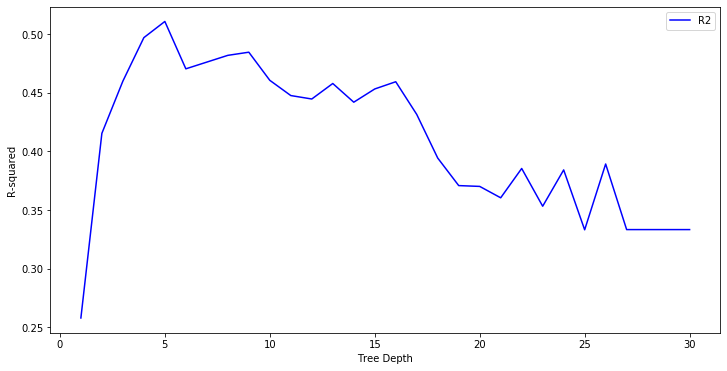

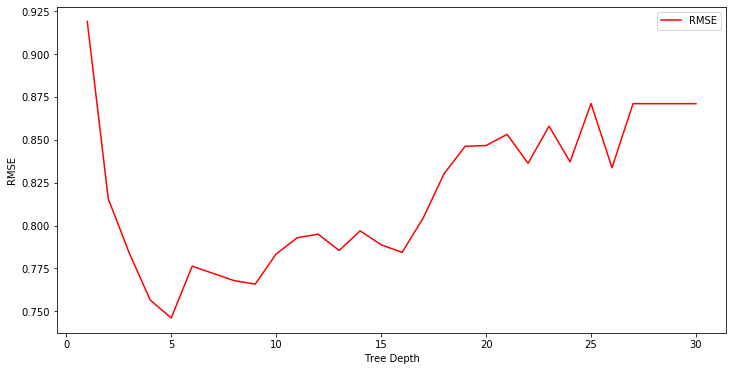

In [24]:
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Hyperparameter tuning (II)

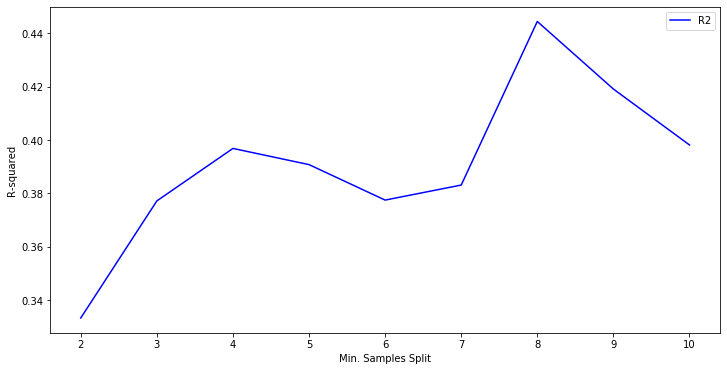

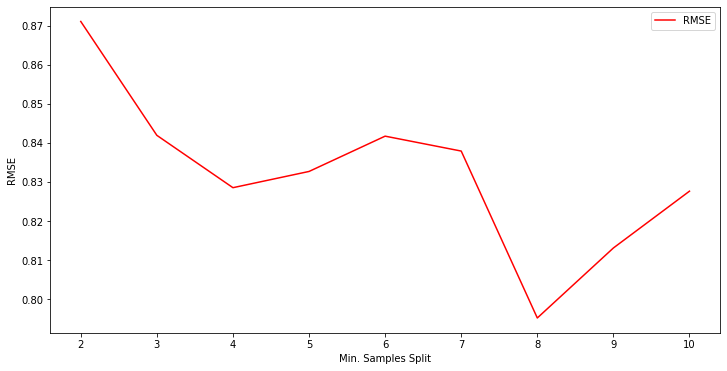

In [25]:
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split),
                                      random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.xlabel('Min. Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.xlabel('Min. Samples Split')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Run the optimized model

In [26]:
regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=5, random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.5108375424818208,
 0.7461293198136718,
 DecisionTreeRegressor(max_depth=5, random_state=45))

In [27]:
# Evaluate these predictions
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error:0.47
Mean Squared Error:0.56
Root Mean Squared Error:0.75
